# Import Libraries

In [417]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [418]:
wine = pd.read_csv('winequality-red.csv')

In [419]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [420]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [421]:
qual = pd.value_counts(wine['quality'],sort=True)

In [422]:
qual

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0, 0.5, 'Count')

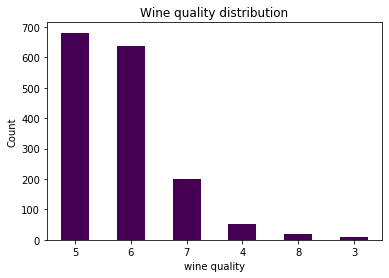

In [423]:
fig = qual.plot(kind='bar',rot=0,colormap='viridis')
plt.title('Wine quality distribution')
plt.xlabel('wine quality')
plt.ylabel('Count')

In [424]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [426]:
#categorise into above average and below wine quality

def isgood(quality):
    if quality>=7:
        return 1
    else:
        return 0

In [427]:
wine['quality'] =wine['quality'].apply(isgood)

In [428]:
wine['quality'].value_counts()


0    1382
1     217
Name: quality, dtype: int64

In [429]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [430]:
good = wine[wine['quality']==1]
average = wine[wine['quality']==0]

In [431]:
good.shape

(217, 12)

In [432]:
average.shape

(1382, 12)

In [433]:
labels = ['good','average']

([<matplotlib.axis.XTick at 0x29de234e438>,
 <a list of 2 Text xticklabel objects>)

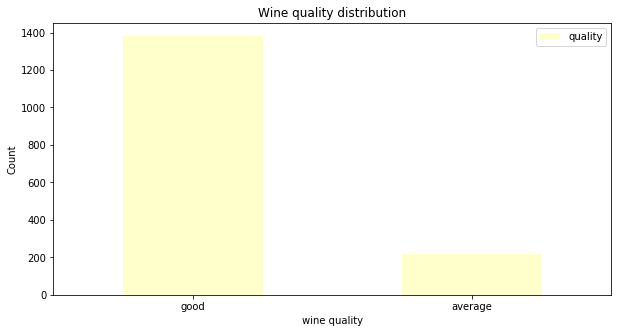

In [434]:
figure=plt.figure(figsize=(10,5))
fig = pd.value_counts(wine['quality'],sort=True)
fig.plot(kind='bar',rot=0,colormap='YlOrRd',alpha=1.0,legend=True)
plt.title('Wine quality distribution')
plt.xlabel('wine quality')
plt.ylabel('Count')
plt.xticks(range(2),labels)

In [435]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [436]:
wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

# Split data for Training model

In [437]:
X = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = wine['quality']

# Standardization scaling to have uniformity across differing units of data

In [438]:
from sklearn.preprocessing import StandardScaler

In [439]:
scaler = StandardScaler()

In [440]:
scaled_features = scaler.fit_transform(wine.drop('quality',axis=1))

In [441]:
df = pd.DataFrame(scaled_features,columns=wine.columns[:-1])

In [442]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [443]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, wine['quality'], test_size=0.33, random_state=100)

# KNN

In [444]:
from sklearn.neighbors import KNeighborsClassifier

In [445]:
knn = KNeighborsClassifier(n_neighbors=5)

In [446]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [447]:
prediction = knn.predict(X_test)

In [448]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [449]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.90      0.92      0.91       456
          1       0.42      0.39      0.41        72

avg / total       0.84      0.84      0.84       528



In [450]:
print(accuracy_score(y_test,prediction))

0.8446969696969697


# Decision Tree

In [451]:
from sklearn.tree import DecisionTreeClassifier

In [452]:
dtree = DecisionTreeClassifier()

In [453]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [454]:
prediction2= dtree.predict(X_test)

In [455]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [456]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.90      0.92      0.91       456
          1       0.42      0.39      0.41        72

avg / total       0.84      0.84      0.84       528



In [457]:
print(accuracy_score(y_test,prediction))

0.8446969696969697


# Random Forest

In [458]:
from sklearn.ensemble import RandomForestClassifier

In [459]:
rfc = RandomForestClassifier()

In [460]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [461]:
pred2= rfc.predict(X_test)

In [462]:
print(classification_report(y_test,pred2))

             precision    recall  f1-score   support

          0       0.92      0.96      0.94       456
          1       0.68      0.47      0.56        72

avg / total       0.89      0.90      0.89       528



In [463]:
print(confusion_matrix(y_test,pred2))

[[440  16]
 [ 38  34]]


In [464]:
print(accuracy_score(y_test,pred2))

0.8977272727272727


# Support Vector Machines

In [465]:
from sklearn.svm import SVC

In [466]:
svm = SVC()

In [467]:
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [468]:
pred3 = svm.predict(X_test)

In [469]:
print(classification_report(y_test,pred3))

             precision    recall  f1-score   support

          0       0.90      0.97      0.93       456
          1       0.59      0.31      0.40        72

avg / total       0.86      0.88      0.86       528



In [470]:
print(accuracy_score(y_test,pred3))

0.8768939393939394


### Try improving accuracy by adjusting parameters with GridSearchCV
### Increased from 86 to 89%

In [471]:
from sklearn.model_selection import GridSearchCV

In [472]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [473]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [474]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.8631284916201117, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] .......... C=0.1, gamma=1, score=0.865546218487395, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.8651685393258427, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8631284916201117, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........ C=0.1, gamma=0.1, score=0.865546218487395, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8651685393258427, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, score=0.865546218487395, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1, gamma=0.001, score=0.8651685393258427, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .... C=0.1, gamma=0.0001, score=0.8631284916201117, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ..... C=0.1, gamma=0.0001, score=0.865546218487395, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .... C=0.1, gamma=0.0001, score=0.8651685393258427, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.8854748603351955, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.8935574229691877, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[CV] ..... C=1000, gamma=0.01, score=0.8820224719101124, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .... C=1000, gamma=0.001, score=0.8743016759776536, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .... C=1000, gamma=0.001, score=0.8851540616246498, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .... C=1000, gamma=0.001, score=0.8764044943820225, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ..... C=1000, gamma=0.0001, score=0.88268156424581, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] .... C=1000, gamma=0.0001, score=0.865546218487395, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ... C=1000, gamma=0.0001, score=0.8651685393258427, total=   0.0s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [475]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [476]:
grid.best_params_

{'C': 10, 'gamma': 1}

In [477]:
pgrid_pred = grid.predict(X_test)

In [478]:
print(classification_report(y_test,pgrid_pred))

             precision    recall  f1-score   support

          0       0.90      0.98      0.94       456
          1       0.69      0.35      0.46        72

avg / total       0.88      0.89      0.87       528



In [479]:
print(accuracy_score(y_test,pgrid_pred))

0.8901515151515151


## Try cross validation

In [496]:
from sklearn.model_selection import cross_val_score

In [504]:
rfc_eval = cross_val_score(estimator=rfc,X = X_train, y=y_train, cv=10)

In [505]:
rfc_eval.mean()

0.8945327755899083